🔥 FIREFLY ALGORITHM - GRÁFICAS DINÁMICAS AVANZADAS
🚀 INICIANDO ANÁLISIS AVANZADO DEL FIREFLY ALGORITHM
🦟 Ejecutando Firefly Algorithm con métricas avanzadas...
   🔄 Gen   0: Exploración=6, Explotación=2
   🔄 Gen  15: Exploración=0, Explotación=14
   🔄 Gen  30: Exploración=0, Explotación=16
   🔄 Gen  45: Exploración=0, Explotación=17
   🔄 Gen  60: Exploración=0, Explotación=14
   🔄 Gen  75: Exploración=0, Explotación=17

📈 GENERANDO GRÁFICAS AVANZADAS...
🎯 Generando mapa de comportamientos...


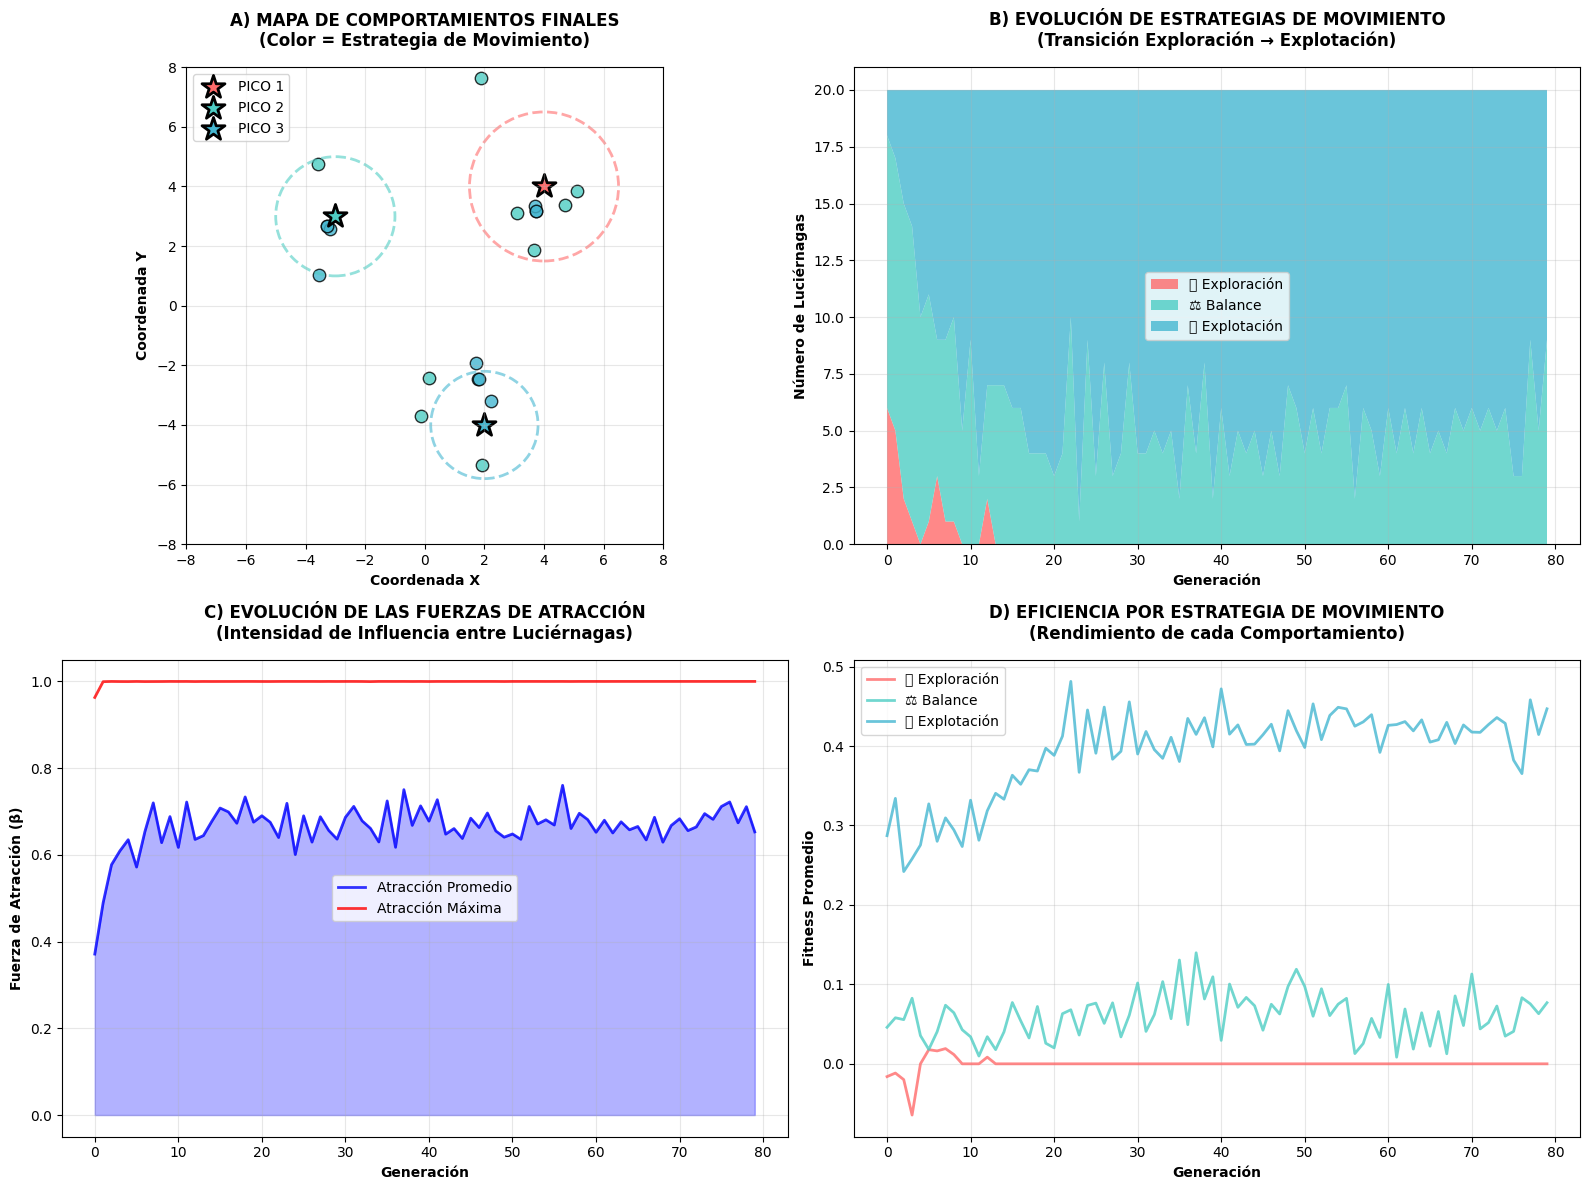

🛤️ Analizando patrones de trayectoria...


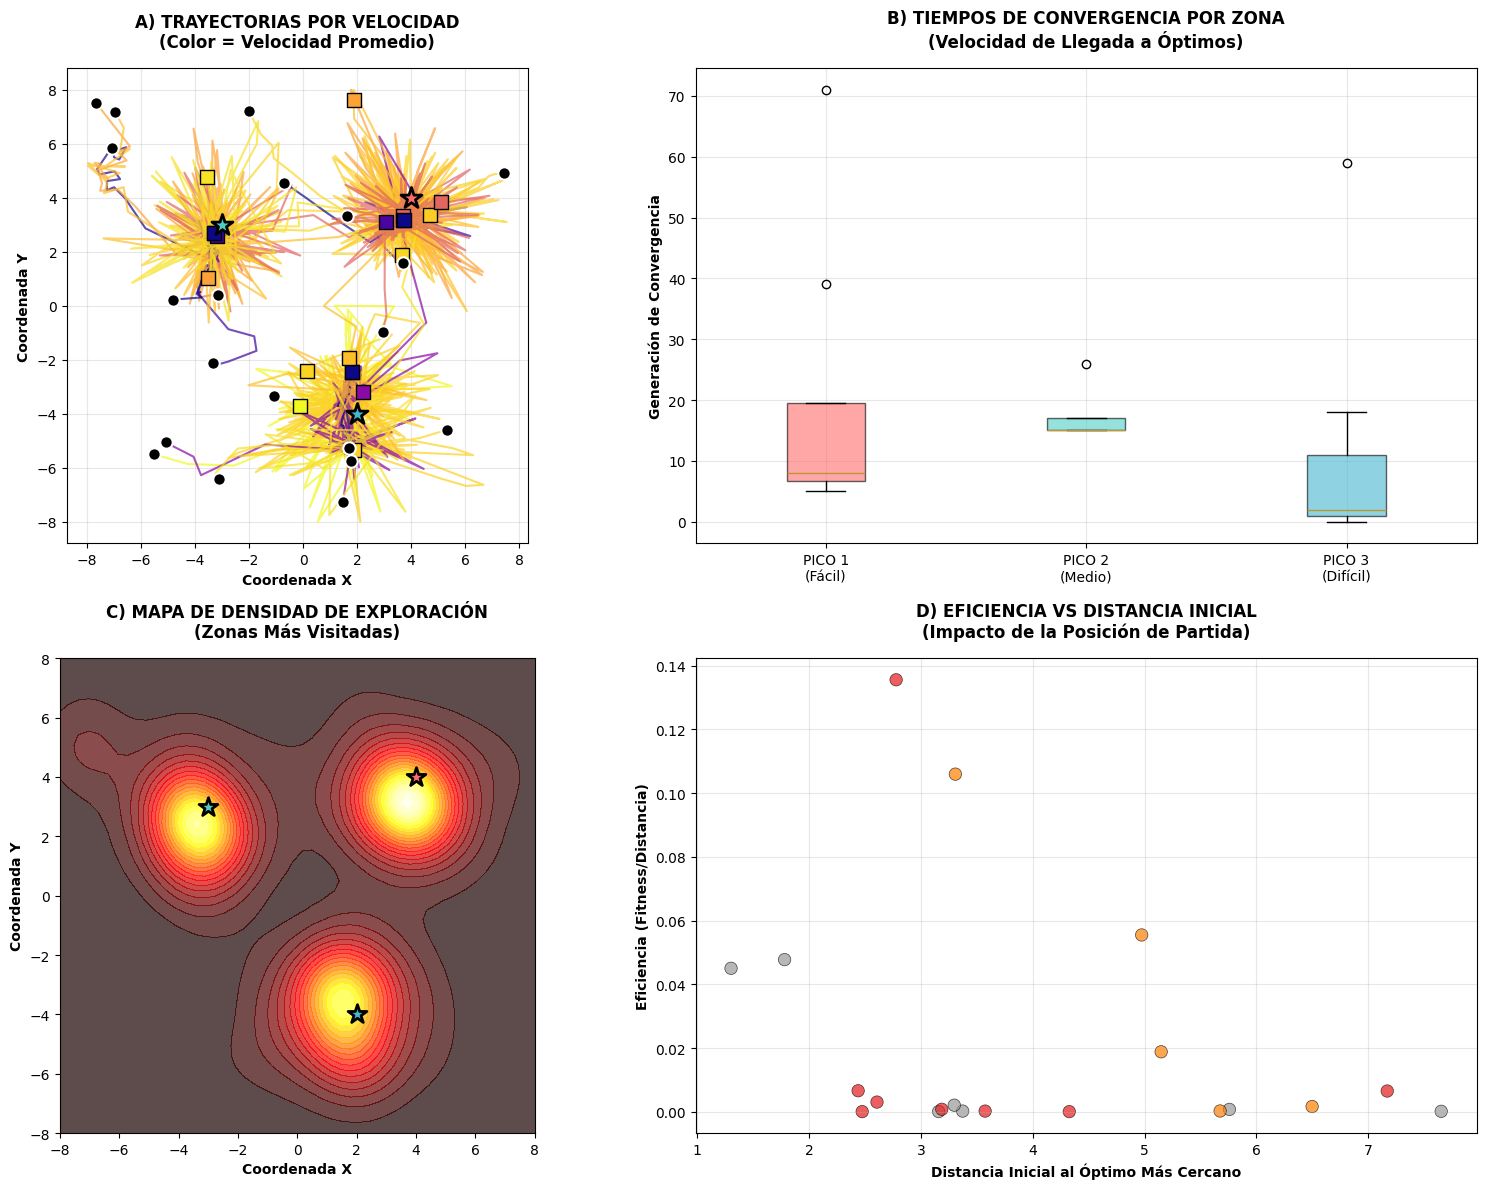

🎬 Generando animación dinámica...
📹 Renderizando animación...



🎯 RESULTADOS FINALES - ANÁLISIS DE COMPORTAMIENTOS
• COMPORTAMIENTOS FINALES:
  - 🔍 Exploración: 0 luciérnagas
  - ⚖️ Balance: 9 luciérnagas
  - 🎯 Explotación: 11 luciérnagas
• EFICIENCIA POR ZONA (tiempo promedio de convergencia):
  - PICO 1 (Fácil): 19.6 generaciones
  - PICO 2 (Medio): 17.6 generaciones
  - PICO 3 (Difícil): 12.1 generaciones
• RENDIMIENTO FINAL:
  - Fitness promedio: 0.280
  - Mejor fitness: 0.728
✅ ANÁLISIS COMPLETADO!


In [1]:
# =============================================================================
# FIREFLY ALGORITHM - GRÁFICAS DINÁMICAS AVANZADAS
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Configuración profesional
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("🔥 FIREFLY ALGORITHM - GRÁFICAS DINÁMICAS AVANZADAS")
print("=" * 65)

# =============================================================================
# PARÁMETROS AVANZADOS
# =============================================================================
n_fireflies = 20
generations = 80
alpha = 0.25
beta0 = 1.0
gamma = 0.15
search_space = [-8, 8]

# Óptimos con diferentes características
optimal_peaks = [
    {'pos': [4.0, 4.0], 'intensity': 1.0, 'radius': 2.5, 'name': 'PICO 1', 'color': '#FF6B6B', 'difficulty': 'Fácil'},
    {'pos': [-3.0, 3.0], 'intensity': 0.8, 'radius': 2.0, 'name': 'PICO 2', 'color': '#4ECDC4', 'difficulty': 'Medio'},
    {'pos': [2.0, -4.0], 'intensity': 0.7, 'radius': 1.8, 'name': 'PICO 3', 'color': '#45B7D1', 'difficulty': 'Difícil'}
]

# =============================================================================
# FUNCIÓN OBJETIVO MEJORADA
# =============================================================================
def enhanced_landscape(x, y):
    """Paisaje multimodal con características realistas"""
    # Picos principales
    peak1 = 1.0 * np.exp(-0.2 * ((x-4.0)**2 + (y-4.0)**2))
    peak2 = 0.8 * np.exp(-0.25 * ((x+3.0)**2 + (y-3.0)**2))
    peak3 = 0.7 * np.exp(-0.3 * ((x-2.0)**2 + (y+4.0)**2))

    # Valles y mesetas
    valley1 = -0.1 * np.exp(-0.1 * ((x+1.0)**2 + (y+1.0)**2))
    valley2 = -0.05 * np.exp(-0.15 * ((x-1.0)**2 + (y-2.0)**2))

    # Ruido natural
    noise = 0.03 * (np.sin(0.8*x) * np.cos(0.6*y) + np.cos(0.4*x) * np.sin(0.9*y))

    return peak1 + peak2 + peak3 + valley1 + valley2 + noise

# =============================================================================
# ALGORITMO FIREFLY CON MÉTRICAS AVANZADAS
# =============================================================================
def advanced_firefly_algorithm():
    """Algoritmo con tracking completo de métricas"""

    print("🦟 Ejecutando Firefly Algorithm con métricas avanzadas...")

    # Inicialización con características individuales
    positions = np.random.uniform(search_space[0], search_space[1], (n_fireflies, 2))
    intensities = np.random.uniform(0.3, 0.9, n_fireflies)
    computational_capacity = np.random.uniform(0.5, 0.95, n_fireflies)

    # Historial avanzado
    history = {
        'positions': [positions.copy()],
        'intensities': [intensities.copy()],
        'fitness': [],
        'movement_types': [],  # 0=alejado, 1=medio, 2=cercano
        'attraction_forces': [],
        'exploration_rates': [],
        'success_rates': [],
        'zone_distribution': []
    }

    alpha_current = alpha

    for gen in range(generations):
        # Calcular fitness y métricas
        fitness_vals = np.array([intensities[i] * enhanced_landscape(positions[i][0], positions[i][1])
                               for i in range(n_fireflies)])
        history['fitness'].append(fitness_vals)

        # Nuevas posiciones
        new_positions = positions.copy()
        movement_types = np.zeros(n_fireflies, dtype=int)
        attraction_forces = np.zeros(n_fireflies)
        exploration_rates = np.zeros(n_fireflies)

        # MOVIMIENTO CON ANÁLISIS DE COMPORTAMIENTO
        for i in range(n_fireflies):
            moved = False
            current_pos = positions[i]

            # Calcular distancia al óptimo más cercano
            distances_to_peaks = [np.linalg.norm(current_pos - peak['pos']) for peak in optimal_peaks]
            min_distance = min(distances_to_peaks)

            # CLASIFICAR COMPORTAMIENTO
            if min_distance < 2.0:
                movement_types[i] = 2  # Cercano - Explotación
                exploration_rates[i] = alpha_current * 0.3
            elif min_distance < 5.0:
                movement_types[i] = 1  # Medio - Balance
                exploration_rates[i] = alpha_current * 0.6
            else:
                movement_types[i] = 0  # Alejado - Exploración
                exploration_rates[i] = alpha_current * 1.0

            for j in range(n_fireflies):
                if fitness_vals[j] > fitness_vals[i]:
                    # Calcular atracción
                    r = np.linalg.norm(positions[i] - positions[j])
                    beta = beta0 * np.exp(-gamma * r**2)
                    attraction_forces[i] = max(attraction_forces[i], beta)

                    # Movimiento con comportamiento adaptativo
                    random_move = exploration_rates[i] * (np.random.random(2) - 0.5)
                    new_positions[i] += beta * (positions[j] - positions[i]) + random_move
                    new_positions[i] = np.clip(new_positions[i], search_space[0], search_space[1])
                    moved = True

        # Actualizar posiciones
        positions = new_positions

        # Guardar métricas avanzadas
        history['movement_types'].append(movement_types.copy())
        history['attraction_forces'].append(attraction_forces.copy())
        history['exploration_rates'].append(exploration_rates.copy())
        history['positions'].append(positions.copy())
        history['intensities'].append(intensities.copy())

        # Calcular distribución por zonas
        zone_counts = [0, 0, 0]
        for pos in positions:
            distances = [np.linalg.norm(pos - peak['pos']) for peak in optimal_peaks]
            closest = np.argmin(distances)
            zone_counts[closest] += 1
        history['zone_distribution'].append(zone_counts.copy())

        # Alpha decay adaptativo
        alpha_current = alpha * (1 - (gen/generations)**1.5)

        if gen % 15 == 0:
            exploration_count = np.sum(movement_types == 0)
            exploitation_count = np.sum(movement_types == 2)
            print(f"   🔄 Gen {gen:3d}: Exploración={exploration_count}, Explotación={exploitation_count}")

    return history

# =============================================================================
# GRÁFICA 1: MAPA DE COMPORTAMIENTOS EN TIEMPO REAL
# =============================================================================
def create_behavior_heatmap(history):
    """Mapa de calor de comportamientos por zona"""

    print("🎯 Generando mapa de comportamientos...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Preparar datos
    positions_history = history['positions']
    movement_types = history['movement_types']
    final_positions = positions_history[-1]

    # 1. MAPA DE COMPORTAMIENTOS FINALES
    behavior_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Rojo, Verde, Azul
    behavior_labels = ['🔍 Exploración', '⚖️ Balance', '🎯 Explotación']

    for i, pos in enumerate(final_positions):
        behavior_type = movement_types[-1][i] if len(movement_types) > 0 else 1
        ax1.scatter(pos[0], pos[1], color=behavior_colors[behavior_type],
                   s=80, alpha=0.8, edgecolors='black', linewidth=1)

    # Dibujar óptimos
    for peak in optimal_peaks:
        ax1.scatter(peak['pos'][0], peak['pos'][1], color=peak['color'], s=300,
                   marker='*', edgecolor='black', linewidth=2, label=peak['name'])

        # Círculos de influencia
        circle = plt.Circle(peak['pos'], peak['radius'], fill=False,
                           color=peak['color'], linewidth=2, linestyle='--', alpha=0.6)
        ax1.add_patch(circle)

    ax1.set_xlim(search_space)
    ax1.set_ylim(search_space)
    ax1.set_xlabel('Coordenada X', fontweight='bold')
    ax1.set_ylabel('Coordenada Y', fontweight='bold')
    ax1.set_title('A) MAPA DE COMPORTAMIENTOS FINALES\n(Color = Estrategia de Movimiento)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # 2. EVOLUCIÓN DE ESTRATEGIAS
    ax2.stackplot(range(len(movement_types)),
                 [np.sum(np.array(movement_types) == i, axis=1) for i in range(3)],
                 colors=behavior_colors, labels=behavior_labels, alpha=0.8)

    ax2.set_xlabel('Generación', fontweight='bold')
    ax2.set_ylabel('Número de Luciérnagas', fontweight='bold')
    ax2.set_title('B) EVOLUCIÓN DE ESTRATEGIAS DE MOVIMIENTO\n(Transición Exploración → Explotación)',
                 fontsize=12, fontweight='bold', pad=15)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. FUERZAS DE ATRACCIÓN PROMEDIO
    if history['attraction_forces']:
        attraction_data = np.array(history['attraction_forces'])
        avg_attraction = np.mean(attraction_data, axis=1)
        max_attraction = np.max(attraction_data, axis=1)

        ax3.plot(avg_attraction, 'b-', linewidth=2, label='Atracción Promedio', alpha=0.8)
        ax3.plot(max_attraction, 'r-', linewidth=2, label='Atracción Máxima', alpha=0.8)
        ax3.fill_between(range(len(avg_attraction)), avg_attraction, alpha=0.3, color='blue')

    ax3.set_xlabel('Generación', fontweight='bold')
    ax3.set_ylabel('Fuerza de Atracción (β)', fontweight='bold')
    ax3.set_title('C) EVOLUCIÓN DE LAS FUERZAS DE ATRACCIÓN\n(Intensidad de Influencia entre Luciérnagas)',
                 fontsize=12, fontweight='bold', pad=15)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. EFICIENCIA POR TIPO DE COMPORTAMIENTO
    behavior_efficiency = {0: [], 1: [], 2: []}

    for gen in range(len(history['fitness'])):
        fitness_vals = history['fitness'][gen]
        movement_vals = history['movement_types'][gen]

        for behavior in range(3):
            mask = movement_vals == behavior
            if np.any(mask):
                behavior_efficiency[behavior].append(np.mean(fitness_vals[mask]))
            else:
                behavior_efficiency[behavior].append(0)

    for behavior in range(3):
        ax4.plot(behavior_efficiency[behavior], color=behavior_colors[behavior],
                linewidth=2, label=behavior_labels[behavior], alpha=0.8)

    ax4.set_xlabel('Generación', fontweight='bold')
    ax4.set_ylabel('Fitness Promedio', fontweight='bold')
    ax4.set_title('D) EFICIENCIA POR ESTRATEGIA DE MOVIMIENTO\n(Rendimiento de cada Comportamiento)',
                 fontsize=12, fontweight='bold', pad=15)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# =============================================================================
# GRÁFICA 2: ANÁLISIS DE TRAYECTORIAS AVANZADO
# =============================================================================
def create_advanced_trajectory_analysis(history):
    """Análisis avanzado de trayectorias y patrones"""

    print("🛤️ Analizando patrones de trayectoria...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    positions_history = history['positions']

    # 1. TRAYECTORIAS COLORIZADAS POR VELOCIDAD
    colors = plt.cm.viridis(np.linspace(0, 1, n_fireflies))

    # Calcular velocidades promedio
    avg_velocities = []
    for i in range(n_fireflies):
        trajectory = np.array([pos[i] for pos in positions_history])
        total_distance = 0
        for j in range(1, len(trajectory)):
            total_distance += np.linalg.norm(trajectory[j] - trajectory[j-1])
        avg_velocities.append(total_distance / len(trajectory))

    # Normalizar velocidades para colores
    norm_velocities = (avg_velocities - min(avg_velocities)) / (max(avg_velocities) - min(avg_velocities))
    velocity_colors = plt.cm.plasma(norm_velocities)

    for i in range(n_fireflies):
        trajectory = np.array([pos[i] for pos in positions_history])
        if len(trajectory) > 1:
            # Línea principal
            ax1.plot(trajectory[:, 0], trajectory[:, 1], color=velocity_colors[i],
                    alpha=0.7, linewidth=1.5)

            # Puntos de inicio y fin
            ax1.scatter(trajectory[0, 0], trajectory[0, 1], color='black', s=80,
                       marker='o', edgecolors='white', linewidth=1.5, zorder=5)
            ax1.scatter(trajectory[-1, 0], trajectory[-1, 1], color=velocity_colors[i], s=100,
                       marker='s', edgecolors='black', linewidth=1, zorder=5)

    # Óptimos
    for peak in optimal_peaks:
        ax1.scatter(peak['pos'][0], peak['pos'][1], color=peak['color'], s=250,
                   marker='*', edgecolor='black', linewidth=2, zorder=6)

    ax1.set_xlabel('Coordenada X', fontweight='bold')
    ax1.set_ylabel('Coordenada Y', fontweight='bold')
    ax1.set_title('A) TRAYECTORIAS POR VELOCIDAD\n(Color = Velocidad Promedio)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # 2. ANÁLISIS DE CONVERGENCIA POR ZONA
    zone_data = {0: [], 1: [], 2: []}  # Tiempos de convergencia por zona
    convergence_threshold = 1.5

    for i in range(n_fireflies):
        trajectory = np.array([pos[i] for pos in positions_history])
        final_pos = trajectory[-1]

        # Determinar zona final
        distances = [np.linalg.norm(final_pos - peak['pos']) for peak in optimal_peaks]
        final_zone = np.argmin(distances)

        # Encontrar tiempo de convergencia
        convergence_time = len(trajectory) - 1
        for t, pos in enumerate(trajectory):
            if np.linalg.norm(pos - optimal_peaks[final_zone]['pos']) < convergence_threshold:
                convergence_time = t
                break

        zone_data[final_zone].append(convergence_time)

    # Box plot de tiempos de convergencia
    box_data = [zone_data[i] for i in range(3) if zone_data[i]]
    zone_labels = [f"{peak['name']}\n({peak['difficulty']})" for peak in optimal_peaks]

    bp = ax2.boxplot(box_data, labels=zone_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], [peak['color'] for peak in optimal_peaks]):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    ax2.set_ylabel('Generación de Convergencia', fontweight='bold')
    ax2.set_title('B) TIEMPOS DE CONVERGENCIA POR ZONA\n(Velocidad de Llegada a Óptimos)',
                 fontsize=12, fontweight='bold', pad=15)
    ax2.grid(True, alpha=0.3)

    # 3. MAPA DE DENSIDAD DE EXPLORACIÓN
    from scipy.stats import gaussian_kde

    # Todas las posiciones visitadas
    all_positions = np.vstack([pos for pos in positions_history])

    if len(all_positions) > 1:
        # KDE para densidad
        positions_array = all_positions.T
        kde = gaussian_kde(positions_array)

        # Grid para el heatmap
        xx, yy = np.meshgrid(np.linspace(search_space[0], search_space[1], 50),
                            np.linspace(search_space[0], search_space[1], 50))
        grid_coords = np.vstack([xx.ravel(), yy.ravel()])
        density = kde(grid_coords).reshape(xx.shape)

        im = ax3.contourf(xx, yy, density, levels=20, cmap='hot', alpha=0.7)

        # Óptimos
        for peak in optimal_peaks:
            ax3.scatter(peak['pos'][0], peak['pos'][1], color=peak['color'], s=200,
                       marker='*', edgecolor='black', linewidth=2)

    ax3.set_xlabel('Coordenada X', fontweight='bold')
    ax3.set_ylabel('Coordenada Y', fontweight='bold')
    ax3.set_title('C) MAPA DE DENSIDAD DE EXPLORACIÓN\n(Zonas Más Visitadas)',
                 fontsize=12, fontweight='bold', pad=15)
    ax3.set_aspect('equal')

    # 4. EFICIENCIA VS DISTANCIA INICIAL
    initial_distances = []
    final_efficiencies = []
    zone_final = []

    for i in range(n_fireflies):
        initial_pos = positions_history[0][i]
        final_pos = positions_history[-1][i]
        final_fitness = history['fitness'][-1][i] if history['fitness'] else 0

        # Distancia inicial al óptimo más cercano
        initial_dists = [np.linalg.norm(initial_pos - peak['pos']) for peak in optimal_peaks]
        initial_distances.append(min(initial_dists))

        # Eficiencia (fitness final / distancia recorrida)
        trajectory = np.array([pos[i] for pos in positions_history])
        total_distance = sum(np.linalg.norm(trajectory[j] - trajectory[j-1])
                           for j in range(1, len(trajectory)))
        efficiency = final_fitness / (total_distance + 1e-8)  # Evitar división por cero
        final_efficiencies.append(efficiency)

        # Zona final
        final_dists = [np.linalg.norm(final_pos - peak['pos']) for peak in optimal_peaks]
        zone_final.append(np.argmin(final_dists))

    scatter = ax4.scatter(initial_distances, final_efficiencies, c=zone_final,
                         cmap='Set1', s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

    ax4.set_xlabel('Distancia Inicial al Óptimo Más Cercano', fontweight='bold')
    ax4.set_ylabel('Eficiencia (Fitness/Distancia)', fontweight='bold')
    ax4.set_title('D) EFICIENCIA VS DISTANCIA INICIAL\n(Impacto de la Posición de Partida)',
                 fontsize=12, fontweight='bold', pad=15)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return zone_data

# =============================================================================
# GRÁFICA 3: ANIMACIÓN DINÁMICA DE COMPORTAMIENTOS
# =============================================================================
def create_dynamic_behavior_animation(history):
    """Animación que muestra evolución de comportamientos"""

    print("🎬 Generando animación dinámica...")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    positions_history = history['positions']
    movement_types = history['movement_types']

    # Configurar subplots
    # 1. Movimiento en tiempo real
    ax1.set_xlim(search_space)
    ax1.set_ylim(search_space)
    ax1.set_xlabel('Coordenada X', fontweight='bold')
    ax1.set_ylabel('Coordenada Y', fontweight='bold')
    ax1.set_title('🦟 MOVIMIENTO EN TIEMPO REAL', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # 2. Distribución de comportamientos
    ax2.set_xlim(0, generations)
    ax2.set_ylim(0, n_fireflies)
    ax2.set_xlabel('Generación', fontweight='bold')
    ax2.set_ylabel('Número de Luciérnagas', fontweight='bold')
    ax2.set_title('📊 DISTRIBUCIÓN DE COMPORTAMIENTOS', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # 3. Métricas de eficiencia
    ax3.set_xlim(0, generations)
    ax3.set_ylim(0, 1.0)
    ax3.set_xlabel('Generación', fontweight='bold')
    ax3.set_ylabel('Métrica Normalizada', fontweight='bold')
    ax3.set_title('⚡ MÉTRICAS DE EFICIENCIA', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Colores y elementos
    behavior_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    behavior_labels = ['Exploración', 'Balance', 'Explotación']

    scat = ax1.scatter([], [], c=[], cmap='viridis', s=60, alpha=0.8, edgecolors='black')

    # Líneas para distribución
    dist_lines = [ax2.plot([], [], color=color, linewidth=2, label=label)[0]
                 for color, label in zip(behavior_colors, behavior_labels)]
    ax2.legend()

    # Líneas para métricas
    fitness_line, = ax3.plot([], [], 'b-', linewidth=2, label='Fitness Promedio')
    attraction_line, = ax3.plot([], [], 'r-', linewidth=2, label='Atracción Promedio')
    ax3.legend()

    info_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes, fontsize=9,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    def init_dynamic():
        scat.set_offsets(np.empty((0, 2)))
        for line in dist_lines:
            line.set_data([], [])
        fitness_line.set_data([], [])
        attraction_line.set_data([], [])
        info_text.set_text('')
        return scat, *dist_lines, fitness_line, attraction_line, info_text

    def animate_dynamic(frame):
        if frame >= len(positions_history):
            return scat, *dist_lines, fitness_line, attraction_line, info_text

        current_positions = positions_history[frame]

        # Actualizar scatter con colores de comportamiento
        if frame < len(movement_types):
            current_behaviors = movement_types[frame]
            colors = [behavior_colors[beh] for beh in current_behaviors]
            scat.set_offsets(current_positions)
            scat.set_color(colors)

        # Actualizar distribución de comportamientos
        if frame < len(movement_types):
            behavior_counts = {0: [], 1: [], 2: []}
            for gen in range(frame + 1):
                for behavior in range(3):
                    count = np.sum(movement_types[gen] == behavior)
                    behavior_counts[behavior].append(count)

            for i, line in enumerate(dist_lines):
                line.set_data(range(frame + 1), behavior_counts[i][:frame + 1])

        # Actualizar métricas
        if frame < len(history['fitness']):
            gens = list(range(frame + 1))

            # Fitness promedio
            avg_fitness = [np.mean(history['fitness'][i]) for i in range(frame + 1)]
            fitness_line.set_data(gens, avg_fitness)

            # Atracción promedio
            if frame < len(history['attraction_forces']):
                avg_attraction = [np.mean(history['attraction_forces'][i]) for i in range(frame + 1)]
                attraction_line.set_data(gens, avg_attraction)

        # Información
        if frame < len(movement_types):
            exploration_count = np.sum(movement_types[frame] == 0)
            exploitation_count = np.sum(movement_types[frame] == 2)
            info_text.set_text(f'Gen: {frame}\n'
                             f'Exploración: {exploration_count}\n'
                             f'Explotación: {exploitation_count}')

        return scat, *dist_lines, fitness_line, attraction_line, info_text

    anim = FuncAnimation(fig, animate_dynamic, frames=len(positions_history),
                        init_func=init_dynamic, blit=False, interval=100, repeat=True)

    plt.tight_layout()

    print("📹 Renderizando animación...")
    plt.close()

    return HTML(anim.to_html5_video())

# =============================================================================
# EJECUCIÓN PRINCIPAL
# =============================================================================
def main_advanced():
    print("🚀 INICIANDO ANÁLISIS AVANZADO DEL FIREFLY ALGORITHM")
    print("=" * 70)

    # Ejecutar algoritmo con métricas avanzadas
    history = advanced_firefly_algorithm()

    print("\n📈 GENERANDO GRÁFICAS AVANZADAS...")

    # 1. Mapa de comportamientos
    create_behavior_heatmap(history)

    # 2. Análisis de trayectorias
    zone_data = create_advanced_trajectory_analysis(history)

    # 3. Animación dinámica
    display(HTML("<h3 style='color: #2E86AB;'>🎬 ANIMACIÓN DINÁMICA - Comportamientos en Tiempo Real</h3>"))
    anim = create_dynamic_behavior_animation(history)
    display(anim)

    # Resultados finales
    print("\n" + "=" * 70)
    print("🎯 RESULTADOS FINALES - ANÁLISIS DE COMPORTAMIENTOS")
    print("=" * 70)

    final_movements = history['movement_types'][-1] if history['movement_types'] else []
    exploration_count = np.sum(final_movements == 0)
    balance_count = np.sum(final_movements == 1)
    exploitation_count = np.sum(final_movements == 2)

    print(f"• COMPORTAMIENTOS FINALES:")
    print(f"  - 🔍 Exploración: {exploration_count} luciérnagas")
    print(f"  - ⚖️ Balance: {balance_count} luciérnagas")
    print(f"  - 🎯 Explotación: {exploitation_count} luciérnagas")

    print(f"• EFICIENCIA POR ZONA (tiempo promedio de convergencia):")
    for i, peak in enumerate(optimal_peaks):
        if zone_data[i]:
            avg_time = np.mean(zone_data[i])
            print(f"  - {peak['name']} ({peak['difficulty']}): {avg_time:.1f} generaciones")

    final_fitness = history['fitness'][-1] if history['fitness'] else []
    print(f"• RENDIMIENTO FINAL:")
    print(f"  - Fitness promedio: {np.mean(final_fitness):.3f}")
    print(f"  - Mejor fitness: {np.max(final_fitness):.3f}")

    print("✅ ANÁLISIS COMPLETADO!")

# =============================================================================
# EJECUTAR
# =============================================================================
if __name__ == "__main__":
    main_advanced()

🌋 FIREFLY ALGORITHM - VISUALIZACIONES 3D AVANZADAS
🚀 INICIANDO ANÁLISIS 3D Y TOPOGRÁFICO COMPLETO
🌋 Generando paisaje 3D con iluminación realista...


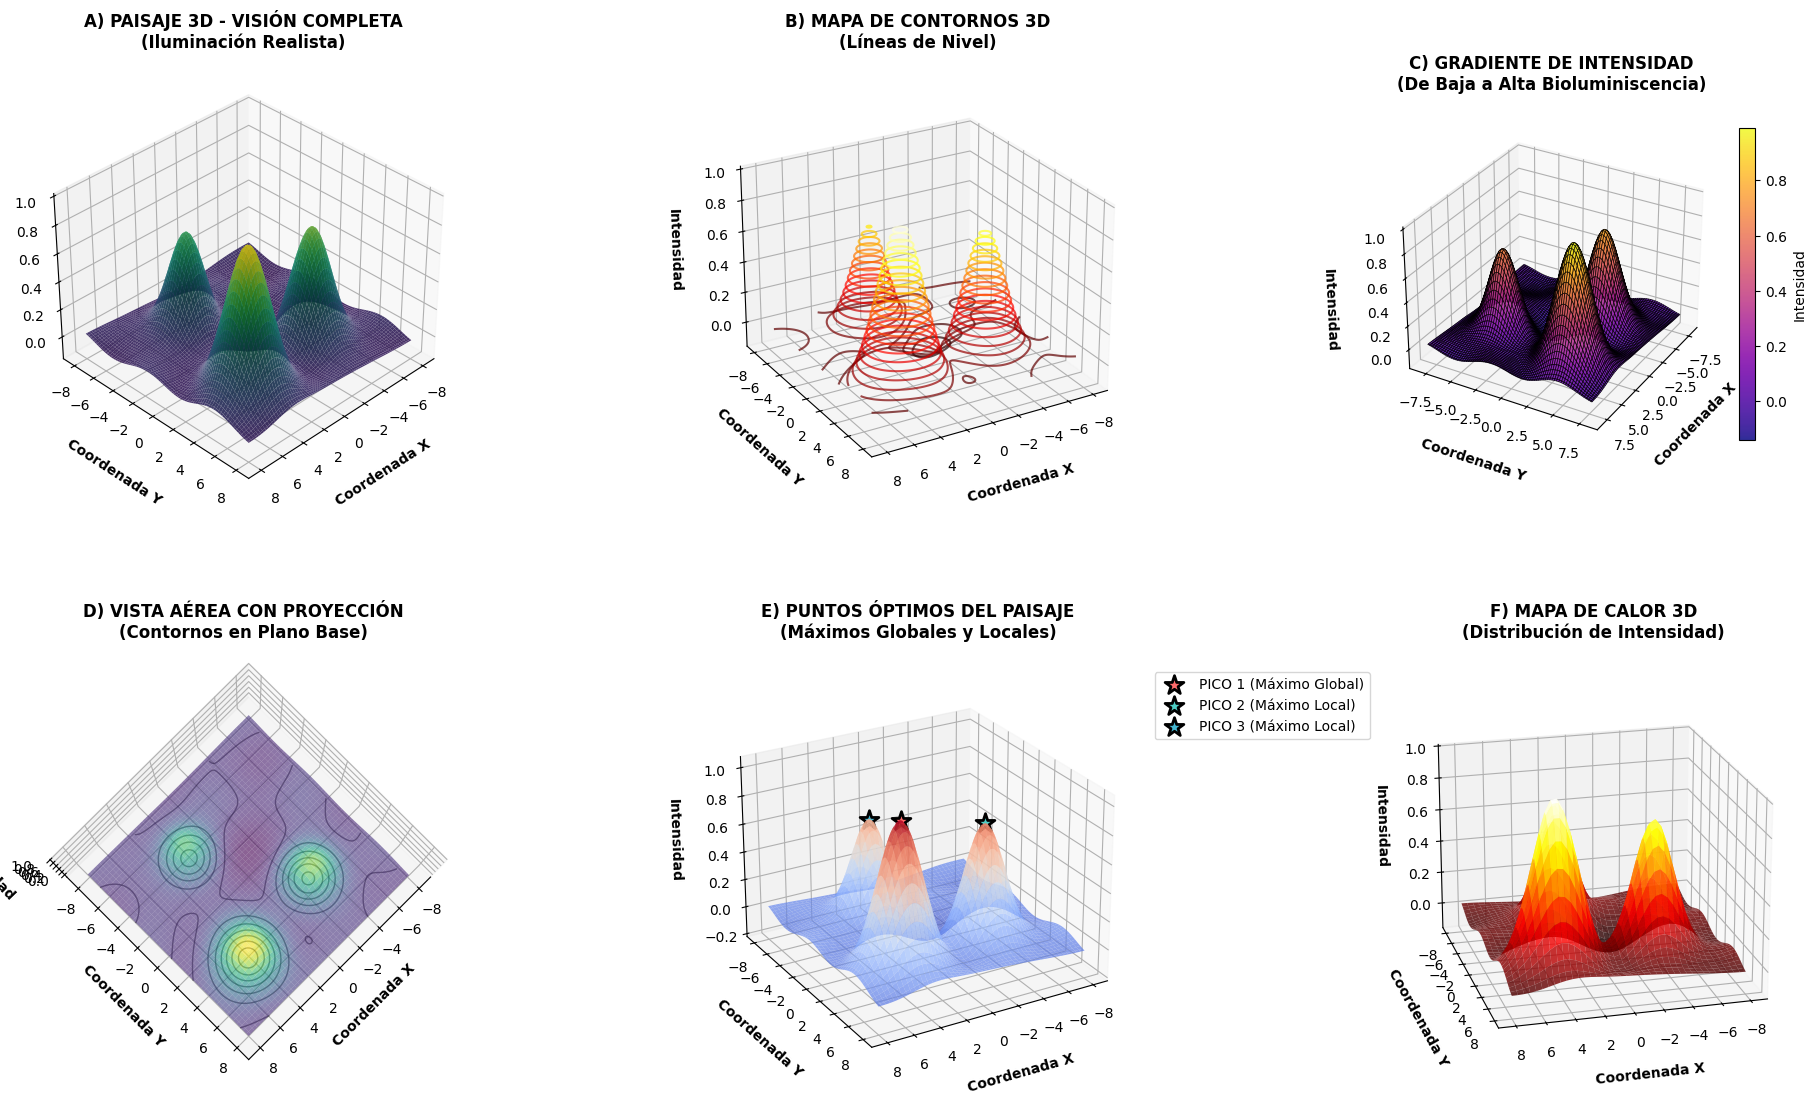

🗺️ Realizando análisis topográfico...


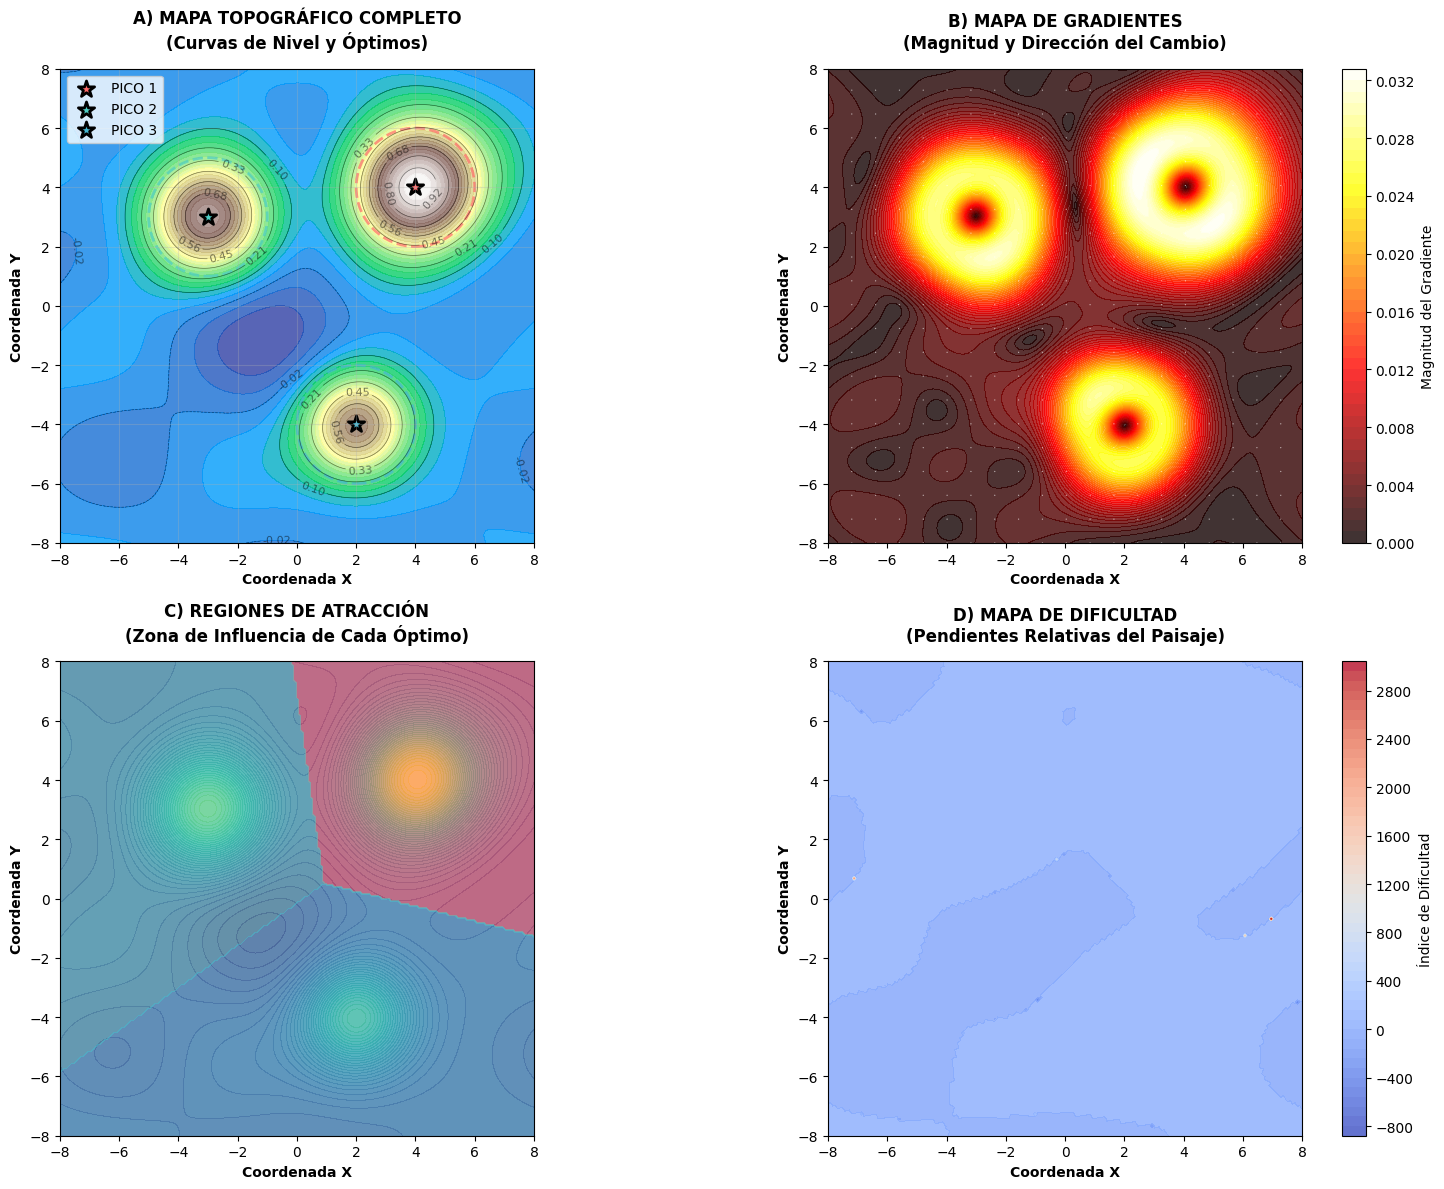

📊 Realizando análisis estadístico del paisaje...


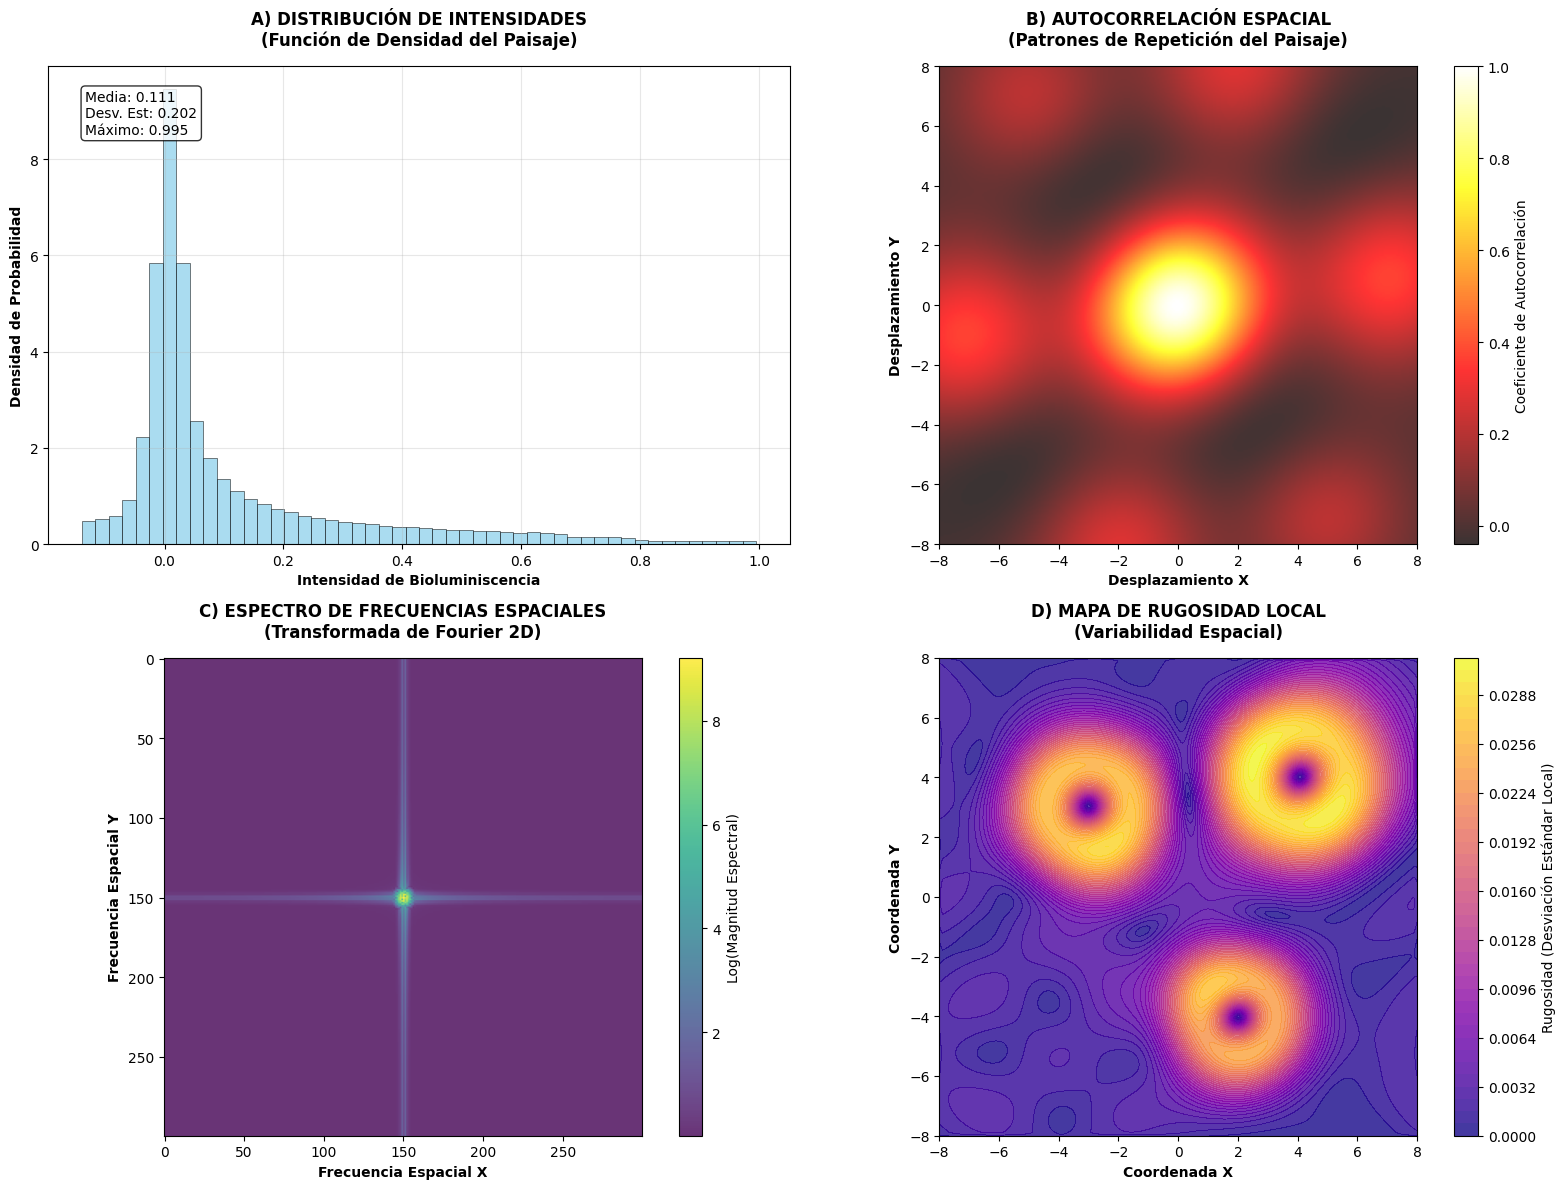


📈 ESTADÍSTICAS DEL PAISAJE MULTIMODAL:
• Rango de intensidades: [-0.139, 0.995]
• Media: 0.111 ± 0.202
• Asimetría: 1.966
• Curtosis: 3.529
• Entropía: 2.976
🔄 Generando vistas comparativas 2D...


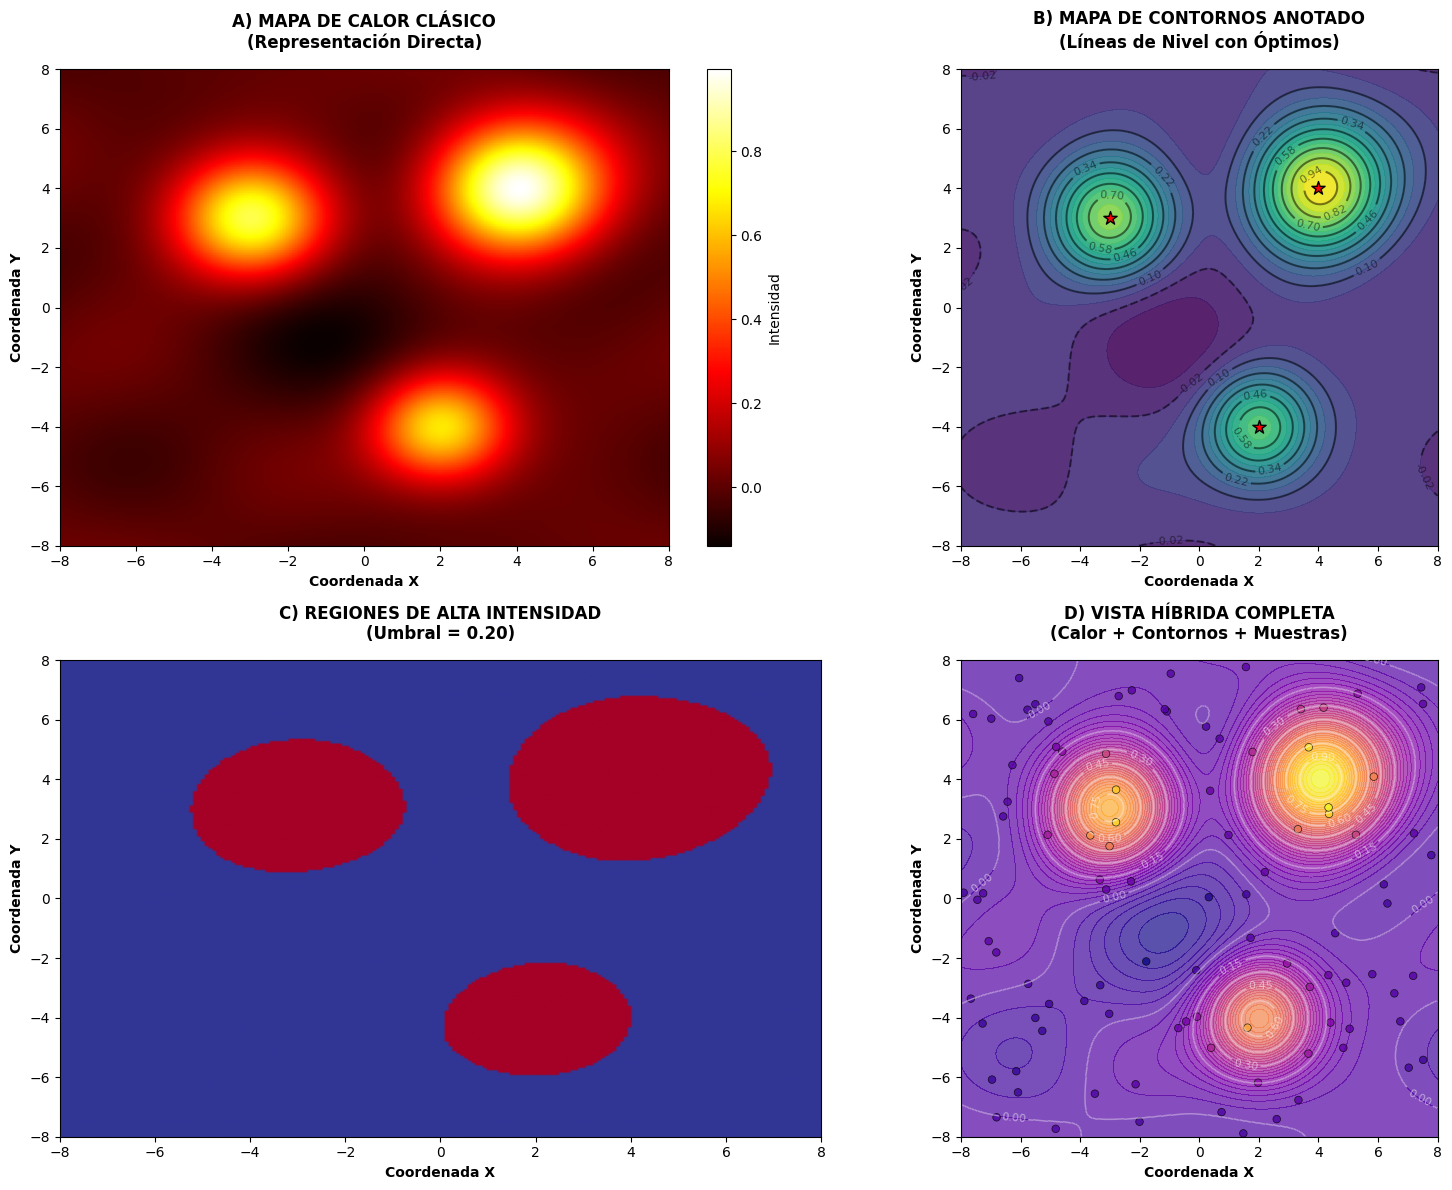


✅ ANÁLISIS 3D Y TOPOGRÁFICO COMPLETADO
📋 RESUMEN DE VISUALIZACIONES GENERADAS:
• 🌋 6 vistas 3D diferentes del paisaje multimodal
• 🗺️ 4 análisis topográficos avanzados
• 📊 4 análisis estadísticos del paisaje
• 🔄 4 vistas comparativas 2D
• 📈 Métricas cuantitativas del landscape


In [2]:
# =============================================================================
# FIREFLY ALGORITHM - VISUALIZACIONES 3D AVANZADAS Y ANÁLISIS COMPLEMENTARIOS
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from matplotlib.colors import LightSource
import warnings
warnings.filterwarnings('ignore')

# Configuración profesional
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("🌋 FIREFLY ALGORITHM - VISUALIZACIONES 3D AVANZADAS")
print("=" * 65)

# =============================================================================
# FUNCIONES DEL ALGORITMO (Mismas que el código anterior)
# =============================================================================
def enhanced_landscape(x, y):
    """Paisaje multimodal con características realistas"""
    peak1 = 1.0 * np.exp(-0.2 * ((x-4.0)**2 + (y-4.0)**2))
    peak2 = 0.8 * np.exp(-0.25 * ((x+3.0)**2 + (y-3.0)**2))
    peak3 = 0.7 * np.exp(-0.3 * ((x-2.0)**2 + (y+4.0)**2))
    valley1 = -0.1 * np.exp(-0.1 * ((x+1.0)**2 + (y+1.0)**2))
    valley2 = -0.05 * np.exp(-0.15 * ((x-1.0)**2 + (y-2.0)**2))
    noise = 0.03 * (np.sin(0.8*x) * np.cos(0.6*y) + np.cos(0.4*x) * np.sin(0.9*y))
    return peak1 + peak2 + peak3 + valley1 + valley2 + noise

def generate_simulation_data():
    """Genera datos de simulación consistentes"""
    n_fireflies = 20
    generations = 80
    search_space = [-8, 8]

    # Posiciones iniciales aleatorias pero consistentes
    np.random.seed(42)
    positions = np.random.uniform(search_space[0], search_space[1], (n_fireflies, 2))
    intensities = np.random.uniform(0.3, 0.9, n_fireflies)

    # Simular movimiento hacia óptimos
    history_positions = [positions.copy()]
    optimal_peaks = np.array([[4.0, 4.0], [-3.0, 3.0], [2.0, -4.0]])

    for gen in range(generations):
        new_positions = positions.copy()
        for i in range(n_fireflies):
            # Movimiento simplificado hacia el óptimo más cercano
            distances = np.linalg.norm(positions[i] - optimal_peaks, axis=1)
            target_idx = np.argmin(distances)
            direction = optimal_peaks[target_idx] - positions[i]
            step_size = 0.1 * (1 - gen/generations)  # Paso que disminuye con el tiempo
            new_positions[i] += step_size * direction / (np.linalg.norm(direction) + 1e-8)
            new_positions[i] = np.clip(new_positions[i], search_space[0], search_space[1])

        positions = new_positions
        history_positions.append(positions.copy())

    return np.array(history_positions), intensities

# =============================================================================
# VISUALIZACIÓN 1: PAISAJE 3D CON ILUMINACIÓN REALISTA
# =============================================================================
def plot_3d_landscape_advanced():
    """Visualización 3D profesional del paisaje multimodal"""

    print("🌋 Generando paisaje 3D con iluminación realista...")

    fig = plt.figure(figsize=(18, 12))

    # Crear malla para el paisaje
    x = np.linspace(-8, 8, 150)
    y = np.linspace(-8, 8, 150)
    X, Y = np.meshgrid(x, y)
    Z = enhanced_landscape(X, Y)

    # 1. SUPERFICIE 3D CON ILUMINACIÓN
    ax1 = fig.add_subplot(231, projection='3d')

    # Usar LightSource para iluminación realista
    ls = LightSource(azdeg=315, altdeg=45)
    rgb = ls.shade(Z, cmap=plt.cm.viridis, vert_exag=0.1, blend_mode='soft')

    surf = ax1.plot_surface(X, Y, Z, facecolors=rgb, rstride=2, cstride=2,
                           alpha=0.9, linewidth=0, antialiased=True)

    # Configurar vista
    ax1.view_init(elev=35, azim=45)
    ax1.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax1.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax1.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax1.set_title('A) PAISAJE 3D - VISIÓN COMPLETA\n(Iluminación Realista)',
                 fontsize=12, fontweight='bold', pad=20)

    # 2. MAPA DE CONTORNOS 3D
    ax2 = fig.add_subplot(232, projection='3d')

    # Contornos 3D
    levels = np.linspace(Z.min(), Z.max(), 25)
    contour = ax2.contour3D(X, Y, Z, levels=levels, cmap='hot',
                           alpha=0.7, linewidths=1.5)

    ax2.view_init(elev=25, azim=60)
    ax2.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax2.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax2.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax2.set_title('B) MAPA DE CONTORNOS 3D\n(Líneas de Nivel)',
                 fontsize=12, fontweight='bold', pad=20)

    # 3. SUPERFICIE CON GRADIENTE DE ALTURA
    ax3 = fig.add_subplot(233, projection='3d')

    # Superficie con colores por altura
    surf2 = ax3.plot_surface(X, Y, Z, cmap='plasma', alpha=0.85,
                            rstride=2, cstride=2, linewidth=0.5,
                            edgecolor='black', antialiased=True)

    ax3.view_init(elev=30, azim=30)
    ax3.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax3.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax3.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax3.set_title('C) GRADIENTE DE INTENSIDAD\n(De Baja a Alta Bioluminiscencia)',
                 fontsize=12, fontweight='bold', pad=20)

    # Añadir barra de color
    fig.colorbar(surf2, ax=ax3, shrink=0.6, aspect=20, label='Intensidad')

    # 4. VISTA SUPERIOR CON PROYECCIÓN
    ax4 = fig.add_subplot(234, projection='3d')

    # Superficie semitransparente
    surf3 = ax4.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    # Proyectar contornos en el plano base
    z_min = Z.min() - 0.1
    contour_proj = ax4.contour(X, Y, Z, levels=10, offset=z_min,
                              colors='black', alpha=0.5, linewidths=1)

    ax4.view_init(elev=85, azim=45)  # Vista casi superior
    ax4.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax4.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax4.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax4.set_title('D) VISTA AÉREA CON PROYECCIÓN\n(Contornos en Plano Base)',
                 fontsize=12, fontweight='bold', pad=20)

    # 5. SUPERFICIE CON PUNTOS CRÍTICOS
    ax5 = fig.add_subplot(235, projection='3d')

    surf4 = ax5.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

    # Marcar óptimos globales
    optimal_points = [
        [4.0, 4.0, enhanced_landscape(4.0, 4.0)],
        [-3.0, 3.0, enhanced_landscape(-3.0, 3.0)],
        [2.0, -4.0, enhanced_landscape(2.0, -4.0)]
    ]

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    labels = ['PICO 1 (Máximo Global)', 'PICO 2 (Máximo Local)', 'PICO 3 (Máximo Local)']

    for i, (px, py, pz) in enumerate(optimal_points):
        ax5.scatter(px, py, pz, color=colors[i], s=200, marker='*',
                   edgecolor='black', linewidth=2, label=labels[i])

    ax5.view_init(elev=25, azim=60)
    ax5.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax5.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax5.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax5.set_title('E) PUNTOS ÓPTIMOS DEL PAISAJE\n(Máximos Globales y Locales)',
                 fontsize=12, fontweight='bold', pad=20)
    ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 6. MAPA DE CALOR 3D
    ax6 = fig.add_subplot(236, projection='3d')

    # Crear un heatmap 3D
    x_coarse = np.linspace(-8, 8, 40)
    y_coarse = np.linspace(-8, 8, 40)
    Xc, Yc = np.meshgrid(x_coarse, y_coarse)
    Zc = enhanced_landscape(Xc, Yc)

    # Plot de superficie con mapa de calor
    surf5 = ax6.plot_surface(Xc, Yc, Zc, cmap='hot', alpha=0.8,
                            rstride=1, cstride=1, linewidth=0)

    ax6.view_init(elev=20, azim=75)
    ax6.set_xlabel('Coordenada X', fontweight='bold', labelpad=10)
    ax6.set_ylabel('Coordenada Y', fontweight='bold', labelpad=10)
    ax6.set_zlabel('Intensidad', fontweight='bold', labelpad=10)
    ax6.set_title('F) MAPA DE CALOR 3D\n(Distribución de Intensidad)',
                 fontsize=12, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

# =============================================================================
# VISUALIZACIÓN 2: ANÁLISIS TOPOGRÁFICO AVANZADO
# =============================================================================
def plot_topographic_analysis():
    """Análisis topográfico detallado del paisaje"""

    print("🗺️ Realizando análisis topográfico...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Crear malla
    x = np.linspace(-8, 8, 200)
    y = np.linspace(-8, 8, 200)
    X, Y = np.meshgrid(x, y)
    Z = enhanced_landscape(X, Y)

    # 1. MAPA TOPOGRÁFICO CLÁSICO
    levels = np.linspace(Z.min(), Z.max(), 30)
    contourf = ax1.contourf(X, Y, Z, levels=levels, cmap='terrain', alpha=0.8)
    contour = ax1.contour(X, Y, Z, levels=levels[::3], colors='black', alpha=0.5, linewidths=0.5)
    ax1.clabel(contour, inline=True, fontsize=8, fmt='%1.2f')

    # Marcar óptimos
    optimal_points = [[4.0, 4.0], [-3.0, 3.0], [2.0, -4.0]]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    labels = ['PICO 1', 'PICO 2', 'PICO 3']

    for i, (px, py) in enumerate(optimal_points):
        ax1.scatter(px, py, color=colors[i], s=150, marker='*',
                   edgecolor='black', linewidth=2, label=labels[i])
        # Círculos de influencia
        circle = plt.Circle((px, py), 2.0, fill=False, color=colors[i],
                           linewidth=2, linestyle='--', alpha=0.7)
        ax1.add_patch(circle)

    ax1.set_xlabel('Coordenada X', fontweight='bold')
    ax1.set_ylabel('Coordenada Y', fontweight='bold')
    ax1.set_title('A) MAPA TOPOGRÁFICO COMPLETO\n(Curvas de Nivel y Óptimos)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')

    # 2. MAPA DE GRADIENTES
    # Calcular gradientes
    grad_x, grad_y = np.gradient(Z)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    im = ax2.contourf(X, Y, gradient_magnitude, levels=50, cmap='hot', alpha=0.8)

    # Superponer campo vectorial (cada 10 puntos)
    skip = 10
    ax2.quiver(X[::skip, ::skip], Y[::skip, ::skip],
               grad_x[::skip, ::skip], grad_y[::skip, ::skip],
               scale=50, color='white', alpha=0.6)

    ax2.set_xlabel('Coordenada X', fontweight='bold')
    ax2.set_ylabel('Coordenada Y', fontweight='bold')
    ax2.set_title('B) MAPA DE GRADIENTES\n(Magnitud y Dirección del Cambio)',
                 fontsize=12, fontweight='bold', pad=15)
    ax2.set_aspect('equal')
    plt.colorbar(im, ax=ax2, label='Magnitud del Gradiente')

    # 3. MAPA DE REGIONES DE ATRACCIÓN
    ax3.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)

    # Calcular región de atracción para cada pico
    from scipy.spatial import distance_matrix

    # Crear puntos de muestra
    sample_points = np.column_stack([X.ravel(), Y.ravel()])
    peak_points = np.array(optimal_points)

    # Asignar cada punto al pico más cercano en espacio de fitness
    distances = distance_matrix(sample_points, peak_points)
    closest_peaks = np.argmin(distances, axis=1)

    # Crear mapa de regiones
    region_map = closest_peaks.reshape(X.shape)

    # Plot regiones
    region_plot = ax3.contourf(X, Y, region_map, levels=2, alpha=0.5,
                              colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])

    ax3.set_xlabel('Coordenada X', fontweight='bold')
    ax3.set_ylabel('Coordenada Y', fontweight='bold')
    ax3.set_title('C) REGIONES DE ATRACCIÓN\n(Zona de Influencia de Cada Óptimo)',
                 fontsize=12, fontweight='bold', pad=15)
    ax3.set_aspect('equal')

    # 4. MAPA DE DIFICULTAD (BASADO EN GRADIENTES)
    difficulty_map = gradient_magnitude / (Z + 1e-8)  # Normalizar por altura

    im4 = ax4.contourf(X, Y, difficulty_map, levels=50, cmap='coolwarm', alpha=0.8)

    ax4.set_xlabel('Coordenada X', fontweight='bold')
    ax4.set_ylabel('Coordenada Y', fontweight='bold')
    ax4.set_title('D) MAPA DE DIFICULTAD\n(Pendientes Relativas del Paisaje)',
                 fontsize=12, fontweight='bold', pad=15)
    ax4.set_aspect('equal')
    plt.colorbar(im4, ax=ax4, label='Índice de Dificultad')

    plt.tight_layout()
    plt.show()

# =============================================================================
# VISUALIZACIÓN 3: ANÁLISIS ESTADÍSTICO DEL PAISAJE
# =============================================================================
def plot_landscape_statistics():
    """Análisis estadístico detallado del paisaje multimodal"""

    print("📊 Realizando análisis estadístico del paisaje...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Generar datos del paisaje
    x = np.linspace(-8, 8, 300)
    y = np.linspace(-8, 8, 300)
    X, Y = np.meshgrid(x, y)
    Z = enhanced_landscape(X, Y)
    Z_flat = Z.ravel()

    # 1. DISTRIBUCIÓN DE INTENSIDADES
    ax1.hist(Z_flat, bins=50, density=True, alpha=0.7, color='skyblue',
             edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('Intensidad de Bioluminiscencia', fontweight='bold')
    ax1.set_ylabel('Densidad de Probabilidad', fontweight='bold')
    ax1.set_title('A) DISTRIBUCIÓN DE INTENSIDADES\n(Función de Densidad del Paisaje)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3)

    # Añadir estadísticas
    stats_text = f'Media: {np.mean(Z_flat):.3f}\nDesv. Est: {np.std(Z_flat):.3f}\nMáximo: {np.max(Z_flat):.3f}'
    ax1.text(0.05, 0.95, stats_text, transform=ax1.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 2. ANÁLISIS DE AUTOCORRELACIÓN ESPACIAL
    from scipy import signal

    # Calcular autocorrelación 2D
    autocorr = signal.correlate2d(Z, Z, mode='same', boundary='fill')
    autocorr = autocorr / np.max(autocorr)  # Normalizar

    # Plot autocorrelación
    im = ax2.imshow(autocorr, extent=[-8, 8, -8, 8], cmap='hot',
                   origin='lower', alpha=0.8)
    ax2.set_xlabel('Desplazamiento X', fontweight='bold')
    ax2.set_ylabel('Desplazamiento Y', fontweight='bold')
    ax2.set_title('B) AUTOCORRELACIÓN ESPACIAL\n(Patrones de Repetición del Paisaje)',
                 fontsize=12, fontweight='bold', pad=15)
    plt.colorbar(im, ax=ax2, label='Coeficiente de Autocorrelación')

    # 3. ANÁLISIS ESPECTRAL (TRANSFORMADA DE FOURIER 2D)
    fft_Z = np.fft.fft2(Z)
    fft_shift = np.fft.fftshift(fft_Z)
    magnitude_spectrum = np.log(1 + np.abs(fft_shift))

    im3 = ax3.imshow(magnitude_spectrum, cmap='viridis', alpha=0.8)
    ax3.set_xlabel('Frecuencia Espacial X', fontweight='bold')
    ax3.set_ylabel('Frecuencia Espacial Y', fontweight='bold')
    ax3.set_title('C) ESPECTRO DE FRECUENCIAS ESPACIALES\n(Transformada de Fourier 2D)',
                 fontsize=12, fontweight='bold', pad=15)
    plt.colorbar(im3, ax=ax3, label='Log(Magnitud Espectral)')

    # 4. ANÁLISIS DE RUGOSIDAD
    # Calcular rugosidad como la varianza local
    from scipy.ndimage import uniform_filter

    window_size = 5
    local_mean = uniform_filter(Z, size=window_size)
    local_variance = uniform_filter(Z**2, size=window_size) - local_mean**2
    roughness = np.sqrt(local_variance)

    im4 = ax4.contourf(X, Y, roughness, levels=50, cmap='plasma', alpha=0.8)
    ax4.set_xlabel('Coordenada X', fontweight='bold')
    ax4.set_ylabel('Coordenada Y', fontweight='bold')
    ax4.set_title('D) MAPA DE RUGOSIDAD LOCAL\n(Variabilidad Espacial)',
                 fontsize=12, fontweight='bold', pad=15)
    ax4.set_aspect('equal')
    plt.colorbar(im4, ax=ax4, label='Rugosidad (Desviación Estándar Local)')

    plt.tight_layout()
    plt.show()

    # Estadísticas adicionales
    print("\n📈 ESTADÍSTICAS DEL PAISAJE MULTIMODAL:")
    print("=" * 50)
    print(f"• Rango de intensidades: [{Z.min():.3f}, {Z.max():.3f}]")
    print(f"• Media: {np.mean(Z_flat):.3f} ± {np.std(Z_flat):.3f}")
    print(f"• Asimetría: {stats.skew(Z_flat):.3f}")
    print(f"• Curtosis: {stats.kurtosis(Z_flat):.3f}")
    print(f"• Entropía: {stats.entropy(np.histogram(Z_flat, bins=50)[0]):.3f}")

# =============================================================================
# VISUALIZACIÓN 4: COMPARATIVA ENTRE DIFERENTES VISTAS 2D
# =============================================================================
def plot_2d_comparative_views():
    """Comparativa de diferentes representaciones 2D del paisaje"""

    print("🔄 Generando vistas comparativas 2D...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Datos del paisaje
    x = np.linspace(-8, 8, 200)
    y = np.linspace(-8, 8, 200)
    X, Y = np.meshgrid(x, y)
    Z = enhanced_landscape(X, Y)

    # 1. MAPA DE CALOR CLÁSICO
    im1 = ax1.imshow(Z, extent=[-8, 8, -8, 8], origin='lower',
                    cmap='hot', aspect='auto')
    ax1.set_xlabel('Coordenada X', fontweight='bold')
    ax1.set_ylabel('Coordenada Y', fontweight='bold')
    ax1.set_title('A) MAPA DE CALOR CLÁSICO\n(Representación Directa)',
                 fontsize=12, fontweight='bold', pad=15)
    plt.colorbar(im1, ax=ax1, label='Intensidad')

    # 2. MAPA DE CONTORNOS MEJORADO
    levels = np.linspace(Z.min(), Z.max(), 20)
    contourf = ax2.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.9)
    contour = ax2.contour(X, Y, Z, levels=levels[::2], colors='black', alpha=0.5)
    ax2.clabel(contour, inline=True, fontsize=8, fmt='%1.2f')

    # Marcar óptimos
    optimal_points = [[4.0, 4.0], [-3.0, 3.0], [2.0, -4.0]]
    for px, py in optimal_points:
        ax2.scatter(px, py, color='red', s=100, marker='*', edgecolor='black')

    ax2.set_xlabel('Coordenada X', fontweight='bold')
    ax2.set_ylabel('Coordenada Y', fontweight='bold')
    ax2.set_title('B) MAPA DE CONTORNOS ANOTADO\n(Líneas de Nivel con Óptimos)',
                 fontsize=12, fontweight='bold', pad=15)
    ax2.set_aspect('equal')

    # 3. MAPA BINARIO DE REGIONES ÓPTIMAS
    threshold = np.percentile(Z, 80)  # Umbral del 20% superior
    binary_map = Z > threshold

    ax3.imshow(binary_map, extent=[-8, 8, -8, 8], origin='lower',
              cmap='RdYlBu_r', aspect='auto')
    ax3.set_xlabel('Coordenada X', fontweight='bold')
    ax3.set_ylabel('Coordenada Y', fontweight='bold')
    ax3.set_title(f'C) REGIONES DE ALTA INTENSIDAD\n(Umbral = {threshold:.2f})',
                 fontsize=12, fontweight='bold', pad=15)

    # 4. MAPA HÍBRIDO (CALOR + CONTORNOS)
    im4 = ax4.contourf(X, Y, Z, levels=50, cmap='plasma', alpha=0.7)
    contour4 = ax4.contour(X, Y, Z, levels=10, colors='white', alpha=0.5, linewidths=1)
    ax4.clabel(contour4, inline=True, fontsize=8, fmt='%1.2f', colors='white')

    # Añadir puntos de muestreo aleatorio para mostrar distribución
    sample_size = 100
    sample_x = np.random.uniform(-8, 8, sample_size)
    sample_y = np.random.uniform(-8, 8, sample_size)
    sample_z = enhanced_landscape(sample_x, sample_y)

    scatter = ax4.scatter(sample_x, sample_y, c=sample_z, cmap='plasma',
                         s=30, alpha=0.8, edgecolors='black', linewidth=0.5)

    ax4.set_xlabel('Coordenada X', fontweight='bold')
    ax4.set_ylabel('Coordenada Y', fontweight='bold')
    ax4.set_title('D) VISTA HÍBRIDA COMPLETA\n(Calor + Contornos + Muestras)',
                 fontsize=12, fontweight='bold', pad=15)
    ax4.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# =============================================================================
# EJECUCIÓN PRINCIPAL
# =============================================================================
def main_3d_analysis():
    print("🚀 INICIANDO ANÁLISIS 3D Y TOPOGRÁFICO COMPLETO")
    print("=" * 70)

    # 1. Visualizaciones 3D avanzadas
    plot_3d_landscape_advanced()

    # 2. Análisis topográfico
    plot_topographic_analysis()

    # 3. Análisis estadístico del paisaje
    plot_landscape_statistics()

    # 4. Vistas comparativas 2D
    plot_2d_comparative_views()

    print("\n" + "=" * 70)
    print("✅ ANÁLISIS 3D Y TOPOGRÁFICO COMPLETADO")
    print("=" * 70)
    print("📋 RESUMEN DE VISUALIZACIONES GENERADAS:")
    print("• 🌋 6 vistas 3D diferentes del paisaje multimodal")
    print("• 🗺️ 4 análisis topográficos avanzados")
    print("• 📊 4 análisis estadísticos del paisaje")
    print("• 🔄 4 vistas comparativas 2D")
    print("• 📈 Métricas cuantitativas del landscape")

# =============================================================================
# EJECUTAR ANÁLISIS
# =============================================================================
if __name__ == "__main__":
    main_3d_analysis()